# Analisis Klasifikasi SMS Spam Menggunakan Support Vector Machines

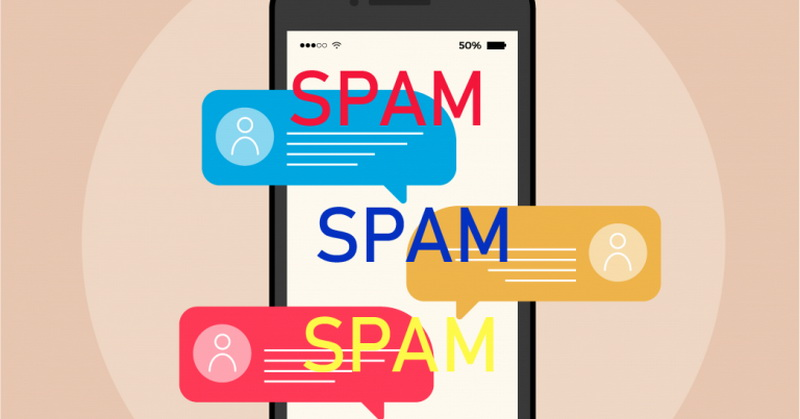

## Permasalahan
Penggunaan sosial media yang sudah banyak di seluruh kalangan umur, membuat penggunaan seperti SMS dan surat-menyurat sudah jarang digunakan. Namun, saat ini ternyata spam SMS masih banyak dilakukan oleh orang-orang yang tidak bertanggung jawab untuk melakukan kejahatan, walaupun tidak sedikit juga yang melakukan untuk menawarkan produk mereka. Dengan begitu, perlu dilakukan klasifikasi pesan spam dan tidak dengan metode SVM.

## Tujuan
Project ini menggunakan text maining dengan bertujuan untuk mengklasifikasiakan SMS spam.

## Sumber Data
Data yang digunakan merupakan data sekunder mengenai data spam SMS. Data
diperoleh dari website Kaggle.com dengan judul SMS Spam Collection Dataset. Terdapat dua variabel pada dataset ini, yaitu v1 berisi label (ham atau spam) dan v2 berisi teks SMS mentah.

## Prosedur Project
1. Menentukan permasalahan project.
2. Import library dan data yang akan digunakan.
3. Feature Engineering.
4. Analisis Eksplorasi Data.
5. Analisis Text Maining dengan SVM.
7. Kesimpulan dan Saran.

## Analisis dan Pembahasan

### Import Library dan Data

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import json, tweepy, requests, re, ast
import string
import nltk
nltk.download('popular')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [60]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Feature Engineering

In [62]:
messages = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1).copy()
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Casefolding

In [63]:
messages['v3']=messages.apply(lambda x: x['v2'].lower(),axis=1)
messages['v3']=messages.apply(lambda x: re.sub(r"\d+", "",x['v3']),axis=1)
messages['v3']=messages.apply(lambda x: x['v3'].translate(str.maketrans("","",string.punctuation)),axis=1)
messages['v3']=messages.apply(lambda x: x['v3'].strip(),axis=1)
messages.head()

,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


Tokenizer

In [64]:
messages['v3']=messages.apply(lambda x: word_tokenize(x['v3']),axis=1)
messages.head()

,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goes, to, usf, he, l..."


Stop Words

In [65]:
list_stopwords = stopwords.words('english')
list_stopwords.extend(["dun","nah","0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"])
list_stopwords = set(list_stopwords) 
messages['v3'] = messages['v3'].apply(lambda x: ' '.join([w for w in x if not w in list_stopwords]))
messages.head()

,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy bugis great buffet cine amo...
1,ham,Ok lar... Joking wif u oni...,lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts text r...
3,ham,U dun say so early hor... U c already then say...,early hor
4,ham,"Nah I don't think he goes to usf, he lives aro...",dont usf lives


### Analisis Eksplorasi Data

In [66]:
messages.describe()

,v1,v2,v3
count,5572,5572,5572
unique,2,5169,4892
top,ham,"Sorry, I'll call later",
freq,4825,30,116


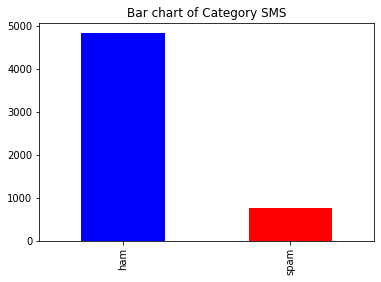

In [67]:
count_Class=pd.value_counts(messages["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "red"])
plt.title('Bar chart of Category SMS')
plt.show()

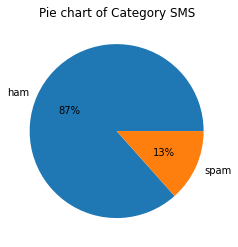

In [68]:
count_Class.plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Pie chart of Category SMS')
plt.ylabel('')
plt.show()

Berdasarkan Bar Chart dan Pie Chart diatas didapatkan bahwa lebih banyak SMS berkategori ham daripada spam dengan ham sebanyak 4825 dan 87%.

In [69]:
count1 = Counter(" ".join(messages[messages['v1']=='ham']["v3"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(messages[messages['v1']=='spam']["v3"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

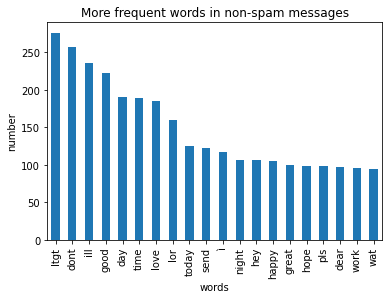

In [70]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Berdasarkan bar Chart diatas didapatkan bahwa SMS ham atau non-spam paling sering berisikan perihal LTGT, dont, ill, good, day, time, love. Dengan begini bahwa pesan yang berisi non-spam tidak ada kata-kata menawarkan produk atau melakukan kejahatan.

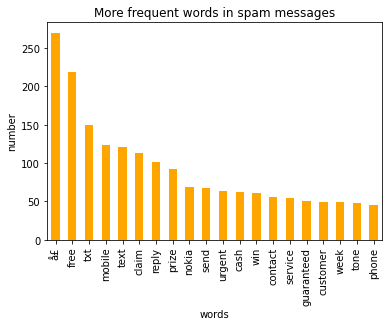

In [71]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Berdasarkan bar Chart diatas didapatkan bahwa SMS spam paling sering berisikan perihal free, mobile, claim, prize, urgent, cash, contact. Dengan begini bahwa pesan yang berisi spam terdapat ada kata-kata menawarkan produk atau melakukan kejahatan.

### Analisis Text Maining dengan SVM.

In [72]:
f = feature_extraction.text.CountVectorizer()
X = f.fit_transform(messages['v3'])
np.shape(X)

(5572, 7920)

In [73]:
messages["v1"]=messages["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, messages['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 7920), (1839, 7920)]


Kernel Linear

In [88]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
  svc = svm.SVC(C=C, kernel='linear', gamma='auto')
  svc.fit(X_train, y_train)
  score_train[count] = svc.score(X_train, y_train)
  score_test[count]= svc.score(X_test, y_test)
  recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
  precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
  count = count + 1

In [89]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.999732,0.969549,0.833333,0.9375
1,600.0,0.999732,0.969549,0.833333,0.9375
2,700.0,0.999732,0.969549,0.833333,0.9375
3,800.0,0.999732,0.969549,0.833333,0.9375
4,900.0,0.999732,0.969549,0.833333,0.9375
5,1000.0,0.999732,0.969549,0.833333,0.9375
6,1100.0,0.999732,0.969549,0.833333,0.9375
7,1200.0,0.999732,0.969549,0.833333,0.9375
8,1300.0,0.999732,0.969549,0.833333,0.9375
9,1400.0,0.999732,0.969549,0.833333,0.9375


In [90]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1573,14
Actual 1,42,210


In [91]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.999732
Test Accuracy       0.969549
Test Recall         0.833333
Test Precision      0.937500
Name: 0, dtype: float64

Kernel RBF

In [93]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
  svc = svm.SVC(C=C, kernel='rbf', gamma='auto')
  svc.fit(X_train, y_train)
  score_train[count] = svc.score(X_train, y_train)
  score_test[count]= svc.score(X_test, y_test)
  recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
  precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
  count = count + 1

In [94]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.990892,0.977162,0.833333,1.000000
1,600.0,0.992767,0.979880,0.853175,1.000000
2,700.0,0.993839,0.979337,0.849206,1.000000
3,800.0,0.994374,0.979337,0.849206,1.000000
4,900.0,0.995178,0.978793,0.849206,0.995349
5,1000.0,0.995178,0.978249,0.845238,0.995327
6,1100.0,0.995982,0.977705,0.841270,0.995305
7,1200.0,0.996250,0.977705,0.841270,0.995305
8,1300.0,0.996250,0.977705,0.841270,0.995305
9,1400.0,0.996785,0.977705,0.841270,0.995305


In [95]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1586,1
Actual 1,41,211


In [96]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      0.990892
Test Accuracy       0.977162
Test Recall         0.833333
Test Precision      1.000000
Name: 0, dtype: float64

### Best Model

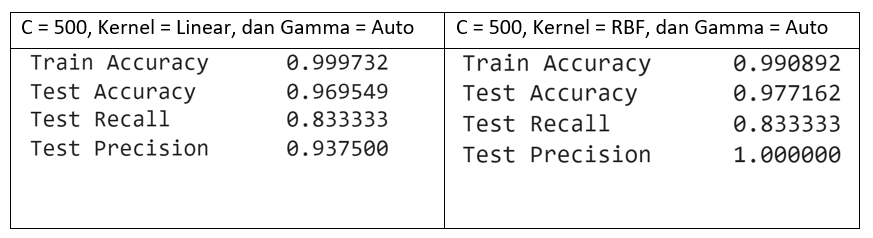

Berdasarkan tabel diatas didapatkan bahwa model terbaik adalah mode dengan parameter c = 500, Kernel yang digunakan RBF, dan Gammanya Auto. Dikarenakan memiliki nilai Akurasi pada data test 97% dan Precision sebesar 100% sehingga model sudah dianggap baik.

## Kesimpulan dan Saran

### Kesimpulan
- Dengan kata terbanyak pada pesan spam membahas mengenai clain, rewards, dan cash. Sedangkan pada pesan ham/non-spam membahas mengenai LGTG, ill, good, and love.
- Didapatkan model terbaik yang dapat mengklasifikasin SMS Spam menggunakan Support Vectom Machines adalah model dengan parameter c = 500 dan kernel RBF. Dengan akurasi yang dihasilakn model sebesar 97%.

### Saran
- Data masih imbalanced sehingga perlu dilakukan penanganan untuk mengatasinya dengan k fold cross validation.
- Lalu, membuat stop words untuk bahasa slang agar data terfilter.

## Refrerensi
- https://github.com/eakbas/tf-svm#tensorflow-linear-svm
- https://medium.com/cs-note/tensorflow-ch4-support-vector-machines-c9ad18878c76
- https://medium.com/@samsudiney/penjelasan-sederhana-tentang-apa-itu-svm-149fec72bd02
- https://medium.datadriveninvestor.com/data-science-support-vector-machine-svm-fa74fb12d349
- https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
- https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72